In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('AZwatch_churn.csv', index_col = 0)
df.head()

,subscriber_id,age_group,engagement_time,engagement_frequency,subscription_status
index,,,,,
0,14451,18-34,5.55,7,subscribed
1,18386,under 18,5.12,12,subscribed
2,12305,35 and over,4.25,4,churned
3,17546,18-34,8.54,15,subscribed
4,15399,18-34,12.12,20,subscribed


In [8]:
# Be familiar with dataset
print('Number of samples:', df.shape[0])
print(df.info())

Number of samples: 1000
<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   subscriber_id         1000 non-null   int64  
 1   age_group             1000 non-null   object 
 2   engagement_time       1000 non-null   float64
 3   engagement_frequency  1000 non-null   int64  
 4   subscription_status   1000 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
None


In [3]:
# Analyze data before modeling
df[['engagement_time','engagement_frequency']].describe()

,engagement_time,engagement_frequency
count,1000.000000,1000.000000
mean,6.180030,9.978000
std,2.757166,6.236859
min,0.220000,0.000000
25%,3.917500,5.000000
50%,6.000000,8.000000
75%,8.110000,15.000000
max,16.980000,45.000000


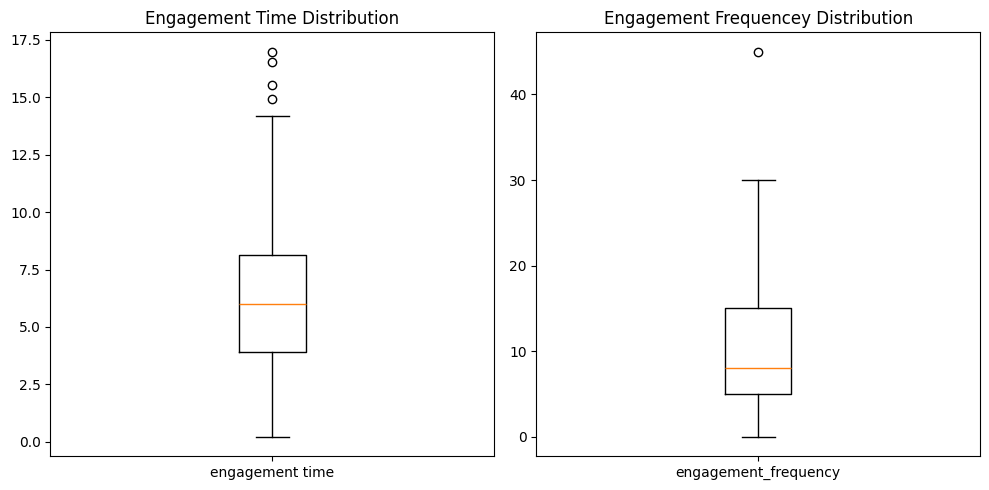

In [7]:
# Visualize the two numerical variables' distribution
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

axs[0].boxplot(x = df['engagement_time'])
axs[0].set_title('Engagement Time Distribution')
axs[0].set_xticklabels(['engagement time'])

axs[1].boxplot(x = df['engagement_frequency'])
axs[1].set_title('Engagement Frequencey Distribution')
axs[1].set_xticklabels(['engagement_frequency'])

plt.tight_layout()
plt.show()

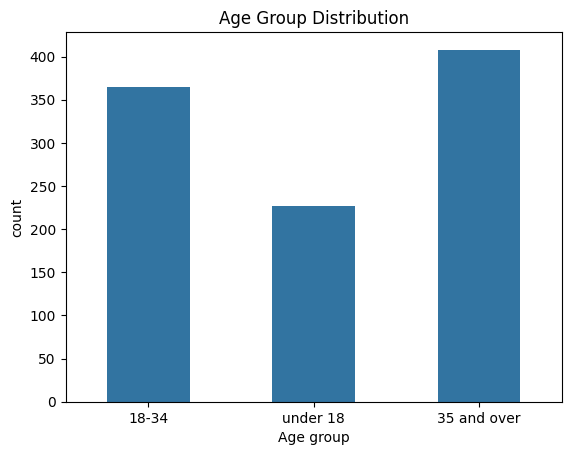

In [10]:
# The distribution of age group 
sns.countplot(x = df['age_group'], width = 0.5)
plt.xlabel('Age group')
plt.title('Age Group Distribution')
plt.show()

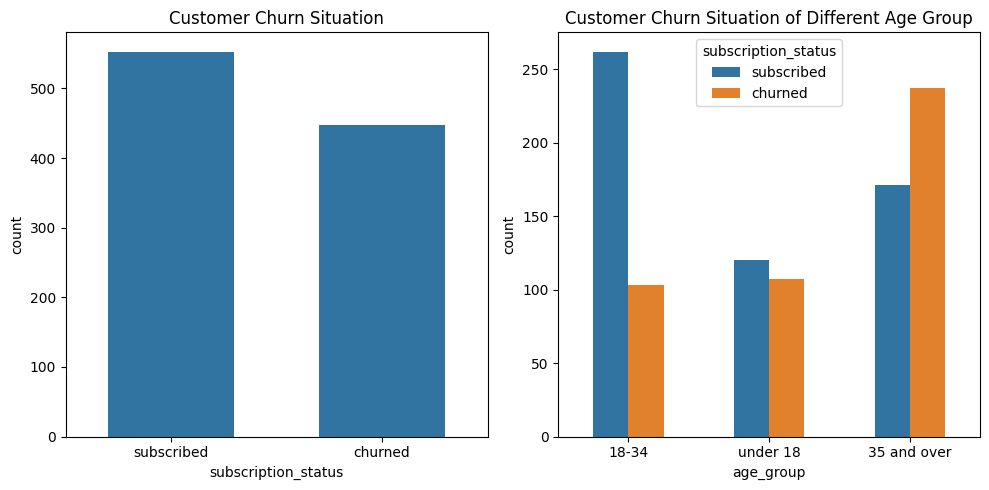

In [12]:
# The churn situation of different age group
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

sns.countplot(x = df['subscription_status'], ax = axs[0], width = 0.6)
axs[0].set_title('Customer Churn Situation')

sns.countplot(x = df['age_group'], hue = df['subscription_status'], ax = axs[1], width = 0.5)
axs[1].set_title('Customer Churn Situation of Different Age Group')

plt.tight_layout()
plt.show()

In [18]:
# Train 3 models to explore(Logistic, Decision Tree, Random Forest)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [16]:
df.head()

,subscriber_id,age_group,engagement_time,engagement_frequency,subscription_status
index,,,,,
0,14451,18-34,5.55,7,0
1,18386,under 18,5.12,12,0
2,12305,35 and over,4.25,4,1
3,17546,18-34,8.54,15,0
4,15399,18-34,12.12,20,0


In [19]:
# Map the target binary variable
df['subscription_status'] = df['subscription_status'].map({'churned': 1, 'subscribed': 0})

In [20]:
# Separate the dataset into input X and output y.
X = df.drop(['subscriber_id', 'subscription_status'], axis = 1)
y = df['subscription_status']

# Check the result
print('The shape of input X is:', X.shape)
print('The shape of output y is:', y.shape)

The shape of input X is: (1000, 3)
The shape of output y is: (1000,)


In [21]:
# Split dataset into 3 sets(training, cross-validation, test)
X_train, X_, y_train, y_ = train_test_split(X, y, test_size = 0.4, random_state = 1)
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size = 0.5, random_state = 1)
del X_, y_

# Check the splitting results
print(f"The shape of X_train is: {X_train.shape}")
print(f"The shape of y_train is: {y_train.shape}\n")
print(f"The shape of X_cv is: {X_cv.shape}")
print(f"The shape of y_cv is: {y_cv.shape}\n")
print(f"The shape of X_test is: {X_test.shape}")
print(f"The shape of y_test is: {y_test.shape}")

The shape of X_train is: (600, 3)
The shape of y_train is: (600,)

The shape of X_cv is: (200, 3)
The shape of y_cv is: (200,)

The shape of X_test is: (200, 3)
The shape of y_test is: (200,)


In [22]:
# Proprocess data for numerical and categorical variables
cat_cols = ['age_group']
num_cols = ['engagement_time','engagement_frequency']

preprocessor = ColumnTransformer(
    transformers = [
        ('cat', OneHotEncoder(sparse_output = False), cat_cols),
        ('num', StandardScaler(), num_cols)       
    ])

preprocessor.set_output(transform = 'pandas')

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_cv_preprocessed = preprocessor.transform(X_cv)

X_train_preprocessed.head()

,cat__age_group_18-34,cat__age_group_35 and over,cat__age_group_under 18,num__engagement_time,num__engagement_frequency
index,,,,,
371,0.0,1.0,0.0,-1.052648,-0.462631
45,0.0,0.0,1.0,0.575796,-1.119234
560,1.0,0.0,0.0,-0.413825,0.686424
748,1.0,0.0,0.0,1.631884,0.522273
419,0.0,1.0,0.0,0.553640,1.014725


In [36]:
X_cv_preprocessed.head()

,cat__age_group_18-34,cat__age_group_35 and over,cat__age_group_under 18,num__engagement_time,num__engagement_frequency
index,,,,,
40,0.0,0.0,1.0,-0.421211,0.850574
154,0.0,1.0,0.0,-1.063726,0.029821
220,0.0,1.0,0.0,0.132682,-0.462631
563,0.0,1.0,0.0,-1.233586,-0.790933
926,0.0,1.0,0.0,-0.945562,-1.283385


In [23]:
# 1. Logictic Regression Model
model1 = LogisticRegression()
model1.fit(X_train_preprocessed, y_train)

# Calculate the accuracy score
train_score = model1.score(X_train_preprocessed, y_train)
test_score = model1.score(X_cv_preprocessed, y_cv)
print('The train_score:', train_score)
print('The test_score:', test_score)

The train_score: 0.8933333333333333
The test_score: 0.9


In [30]:
# 2. Decision Tree Model
model2 = DecisionTreeClassifier(max_depth = 3)
model2.fit(X_train_preprocessed, y_train)

# Calculate the accuracy score
train_score = model2.score(X_train_preprocessed, y_train)
test_score = model2.score(X_cv_preprocessed, y_cv)
print('The train_score:', train_score)
print('The test_score:', test_score)

The train_score: 0.9066666666666666
The test_score: 0.895


In [31]:
# 3. Random Forest Ensemble
model3 = RandomForestClassifier(max_depth = 3, random_state = 1)
model3.fit(X_train_preprocessed, y_train)

# Calculate the accuracy score
train_score = model3.score(X_train_preprocessed, y_train)
test_score = model3.score(X_cv_preprocessed, y_cv)
print('The train_score:', train_score)
print('The test_score:', test_score)

The train_score: 0.905
The test_score: 0.915


In [34]:
# Try different hyperparamters' combinations on model3
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [40, 50, 60],
    'max_features': ['sqrt', 3, 4],
    'max_depth' :[3, 4, 5],
    'min_samples_split': [2, 3, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state = 1), param_grid = param_grid, cv = 5)
grid_search.fit(X_train_preprocessed, y_train)
grid_search.best_params_

{'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 50}

In [35]:
# Calculate the accuracy score of the best combo's model
train_score = grid_search.best_estimator_.score(X_train_preprocessed, y_train)
val_score = grid_search.best_estimator_.score(X_cv_preprocessed, y_cv)
print('The train_score:', train_score)
print('The test_score:', test_score)

The train_score: 0.9116666666666666
The test_score: 0.915


In [39]:
# Retrain the best model on a larger dataset(X_train + X_cv)

# Clone the hyperparameters with max_depth of 4 and n_estimators of 50
from sklearn.base import clone
final_model = clone(grid_search.best_estimator_)

# Train to get the parameters
final_model.fit(pd.concat([X_train_preprocessed, X_cv_preprocessed]), pd.concat([y_train, y_cv]))

# Calculate the accuracy score
train_final_score = final_model.score(pd.concat([X_train_preprocessed, X_cv_preprocessed]), pd.concat([y_train, y_cv]))
print('The train score is:', train_final_score)

# Evaluate the true accuracy score
X_test_preprocessed = preprocessor.transform(X_test)
score = final_model.score(X_test_preprocessed, y_test)
print('The score is:', score)     

The train score is: 0.91125
The score is: 0.905


In [41]:
# KMeans clustering

# Choose the used features 
segmentation = X.drop('age_group', axis = 1)
segmentation.head()

,engagement_time,engagement_frequency
index,,
0,5.55,7
1,5.12,12
2,4.25,4
3,8.54,15
4,12.12,20


In [46]:
# Normalize variables before implementing KMeans
scaler = StandardScaler()
segmentation_normalized = scaler.fit_transform(segmentation)

# Check the normalization result
print('The mean is:', scaler.mean_.squeeze())
print('The std is:', scaler.scale_.squeeze())
print(f"Peak to Peak range by column in  segmentation: {(segmentation.max() - segmentation.min()).values}")
np.ptp(segmentation_normalized, axis = 0)


The mean is: [6.18003 9.978  ]
The std is: [2.75578731 6.23374013]
Peak to Peak range by column in  segmentation: [16.76 45.  ]


array([6.08174656, 7.21878023])

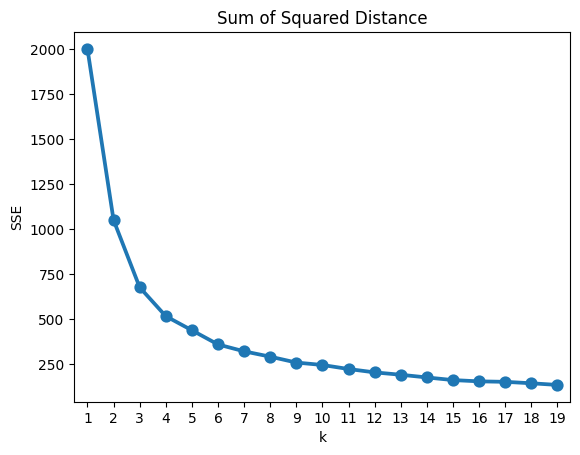

In [49]:
# Use elbow method to explore the number of clusters
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters = k, random_state = 1)
    kmeans.fit(segmentation_normalized)
    sse[k] = kmeans.inertia_

sns.pointplot(x = list(sse.keys()), y = list(sse.values()))
plt.title('Sum of Squared Distance')
plt.xlabel('k'); plt.ylabel('SSE')
plt.show()
    

In [51]:
# Apply 3 clusters to KMeans
kmeans = KMeans(n_clusters = 3, random_state = 1)
kmeans.fit(segmentation_normalized)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,1
,copy_x,True
,algorithm,'lloyd'


In [57]:
# Analyze average feature values and counts per cluster
segmentation['cluster_id'] = kmeans.labels_

analysis = segmentation.groupby('cluster_id').agg({
    'engagement_time': ['mean'],
    'engagement_frequency': ['mean'],
    'cluster_id': ['count']                                                 
}).rename(columns = {'cluster_id': 'cluster'}).round(0)
analysis

,engagement_time,engagement_frequency,cluster
,mean,mean,count
cluster_id,,,
0,4.0,5.0,428
1,7.0,18.0,295
2,9.0,9.0,277


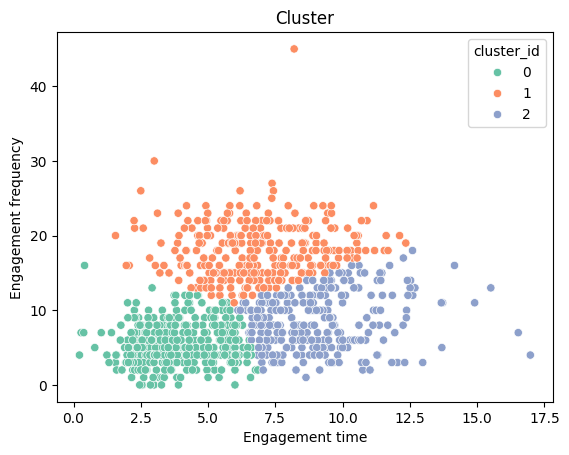

In [59]:
# Visualize the clusters
sns.scatterplot(segmentation, x = 'engagement_time', y = 'engagement_frequency', hue = 'cluster_id', palette ='Set2')
plt.title('Cluster')
plt.xlabel('Engagement time'); plt.ylabel('Engagement frequency')
plt.show()

In [61]:
# Add back interpretable variable
import copy
segmentation_with_age = copy.deepcopy(X)
segmentation_with_age['cluster_id'] = kmeans.labels_
segmentation_with_age.head()

,age_group,engagement_time,engagement_frequency,cluster_id
index,,,,
0,18-34,5.55,7,0
1,under 18,5.12,12,1
2,35 and over,4.25,4,0
3,18-34,8.54,15,1
4,18-34,12.12,20,1


In [66]:
cluster_profile = segmentation_with_age.groupby('cluster_id').agg({
    'engagement_time': ['min','mean','max'],
    'engagement_frequency': ['min','mean','max'],
    'age_group': [('mode', lambda x: x.mode()[0])]
}).rename(columns = {'cluster_id': 'cluster'}).round(1)
cluster_profile

engagement_time            engagement_frequency            \
                       min mean   max                  min  mean max   
cluster_id                                                             
0                      0.2  3.9   7.0                    0   5.4  16   
1                      1.6  6.8  12.4                   11  18.0  45   
2                      6.1  9.0  17.0                    1   8.5  18   

              age_group  
                   mode  
cluster_id               
0           35 and over  
1                 18-34  
2                 18-34

In [69]:
# Uncover age group distribution within each cluster
segmentation_with_age.groupby(['cluster_id', 'age_group']).size().unstack(fill_value = 0)

age_group,18-34,35 and over,under 18
cluster_id,,,
0,56,267,105
1,115,106,74
2,194,35,48
